# Chapter 8 - Data Analysis Case Studies

    • Analysis of unstructured data: Using data from a web page providing
    information about the top 50 highest-grossing movies in France
    during the year 2018

    • Air quality analysis: Data from an air quality monitoring station at
    New Delhi (India), providing the daily levels for four pollutants –
    sulfur dioxide (SO2), oxides of nitrogen as nitrogen dioxide (NO2),
    ozone, and fine particulate matter (PM2.5)

    • COVID-19 trend analysis: Dataset capturing the number of cases and
    deaths for various countries across the world daily for the first six
    months in the year 2020

In [1]:
import numpy as np
import pandas as pd

import requests
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

# Highest Grossing Movies in France

#### Importing the data and examining the characteristics of the dataset

In [2]:
# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'

req = requests.get(url)         # Get the HTML content of the page

html_data = StringIO(req.text)  # Wrap the raw HTML text in a StringIO object

data = pd.read_html(html_data)  # Read the tables from the HTML content

df = data[0]  # Access the first table

df.head()     # Display the first few rows of the DataFrame

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


In [3]:
# Check the unique values in the 'Gross' column to see how the data is formatted
print(df['Gross'].unique())

['US$6,557,062' 'US$2,127,871' 'US$2,006,033' 'US$2,771,269'
 'US$16,604,101' 'US$8,753,427' 'US$7,627,163' 'US$5,637,555'
 'US$16,739,183' 'US$9,546,133' 'US$5,278,842' 'US$3,073,866'
 'US$5,484,062' 'US$3,140,585' 'US$10,568,544' 'US$4,109,407'
 'US$17,645,304' 'US$6,891,789' 'US$6,273,652' 'US$8,836,807'
 'US$4,015,319' 'US$2,770,078' 'US$9,579,503' 'US$4,791,805'
 'US$2,520,159' 'US$1,740,016' 'US$9,454,086' 'US$5,152,960'
 'US$4,859,634' 'US$3,929,857' 'US$8,193,447' 'US$4,350,586'
 'US$2,873,390' 'US$4,513,632' 'US$2,513,203' 'US$1,414,632'
 'US$2,222,791' 'US$4,425,722' 'US$2,254,244' 'US$6,228,621'
 'US$6,646,527' 'US$3,019,547' 'US$9,051,705' 'US$9,676,385'
 'US$5,154,997' 'US$11,438,486' 'US$6,378,619' 'US$3,656,409'
 'US$6,863,693' 'US$4,187,527']


#### Data wrangling

In [4]:
# Removing "US$" and commas from the 'Gross' column
df['Gross'] = df['Gross'].str.replace(r"US\$", "", regex=True)  # Removing 'US$'
df['Gross'] = df['Gross'].str.replace(r",", "", regex=True)     # Removing commas

# Convert the 'Gross' column to numeric for further processing
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')       # Convert to numeric

# Display the cleaned data
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,6557062,[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,2127871,[2]
2,3,"January 21, 2018",Brillantissime,2006033,[3]
3,4,"January 28, 2018",The Post,2771269,[4]
4,5,"February 4, 2018",Les Tuche 3,16604101,[5]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     int64 
 4   Notes   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [6]:
# Changing the data type of the Date column to datetime using pd.to_datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'errors="coerce"' will handle any invalid parsing

# Creating a new column for the month
df['Month'] = pd.DatetimeIndex(df['Date']).month          # Extracting the month component from the 'Date' column

# Displaying the first few rows of the DataFrame
df.head()

,#,Date,Film,Gross,Notes,Month
0,1,2018-01-07,Star Wars: The Last Jedi,6557062,[1],1
1,2,2018-01-14,Jumanji: Welcome to the Jungle,2127871,[2],1
2,3,2018-01-21,Brillantissime,2006033,[3],1
3,4,2018-01-28,The Post,2771269,[4],1
4,5,2018-02-04,Les Tuche 3,16604101,[5],2


In [7]:
#dropping the unnecessary columns
df.drop(['#','Notes'], axis=1, inplace=True)

df.head()

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


#### Visualization

In [8]:
# Creating a new DataFrame 'df1' by selecting the 'Film' and 'Gross' columns and sorting by 'Gross' in descending order
df1 = df[['Film', 'Gross']].sort_values(ascending=False, by='Gross')  

# Resetting the index without keeping the old one
df1.reset_index(drop=True, inplace=True)  # This will reset the index and drop the old one

# Displaying the first few rows of the sorted and modified DataFrame
df1.head()

,Film,Gross
0,Avengers: Infinity War,17645304
1,La ch'tite famille,16739183
2,Les Tuche 3,16604101
3,Fantastic Beasts: The Crimes of Grindelwald,11438486
4,Taxi 5,10568544


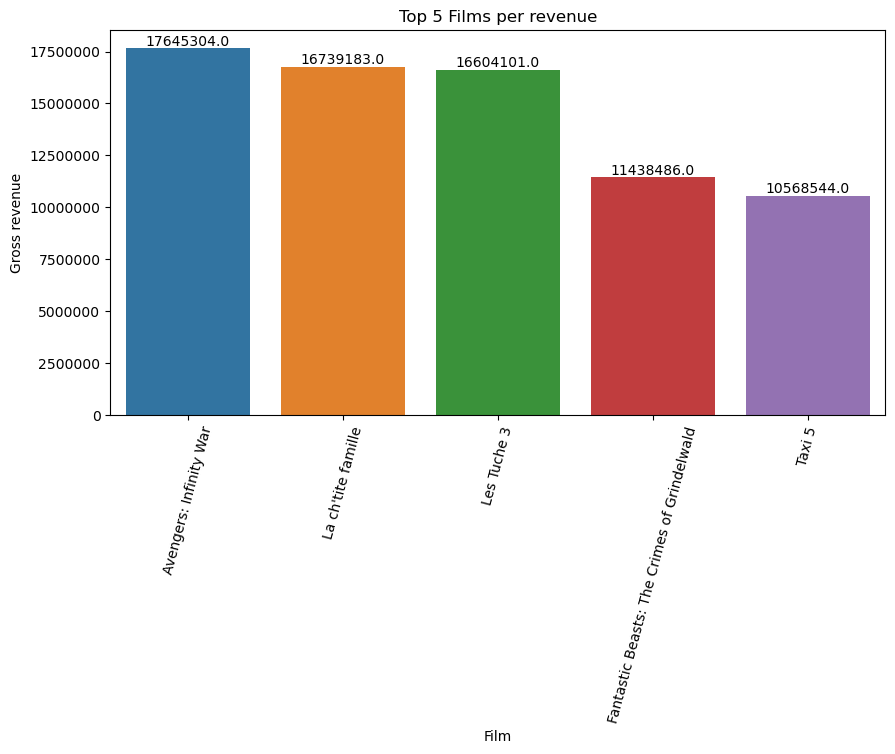

In [9]:
#Plotting the top 5 films by revenue

#setting the figure size
plt.figure(figsize=(10,5))

#creating a bar plot
ax=sns.barplot(x='Film',y='Gross',data=df1.head(5))

#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)

#setting the title
ax.set_title("Top 5 Films per revenue")

#setting the Y-axis labels
ax.set_ylabel("Gross revenue")

# Disable scientific notation on the Y-axis
ax.ticklabel_format(style='plain', axis='y')  # Ensure normal (plain) numbers on the Y-axis

#Labelling the bars in the bar graph
for p in ax.patches:                                      # Looping through each bar (patch) in the plot
    ax.annotate(                                          # Adding annotation (text) to each bar
        p.get_height(),                                   # The text to be displayed is the height of the bar (i.e., the y-value)
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning the text at the center-top of the bar
        ha='center',                                      # Horizontal alignment is set to 'center' so that the text is centered on the bar
        va='bottom'                                       # Vertical alignment is set to 'bottom' to place the text just above the bar
    )

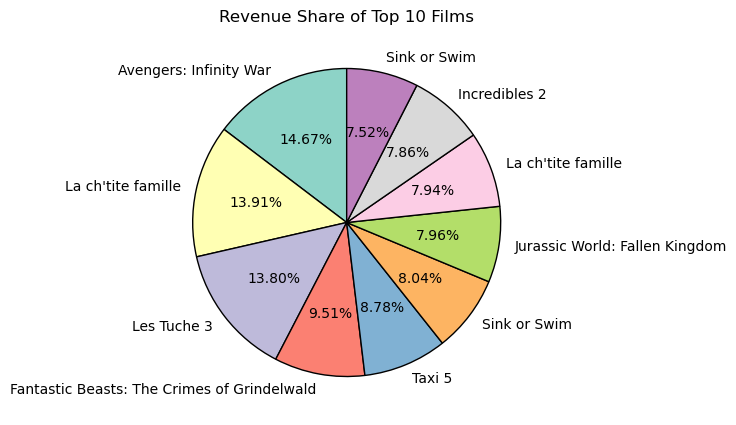

In [10]:
# Pie chart showing the share of each of the top 10 films by percentage of revenue

# Selecting the top 10 films by revenue
top_10_films = df1[['Film', 'Gross']].head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 5))               # Setting the figure size

plt.pie(
    top_10_films['Gross'],                # Values for the pie chart
    labels=top_10_films['Film'],          # Labels for each slice (film titles)
    autopct='%.2f%%',                     # Display percentage with two decimal places
    startangle=90,                        # Start the first slice at 90 degrees
    wedgeprops={'edgecolor': 'black'},    # Adding a black edge around each slice for better visibility
    colors=sns.color_palette("Set3", 10)  # Use a color palette for the pie slices
)

# Adding a title to the pie chart
plt.title('Revenue Share of Top 10 Films')

# Displaying the pie chart
plt.show()

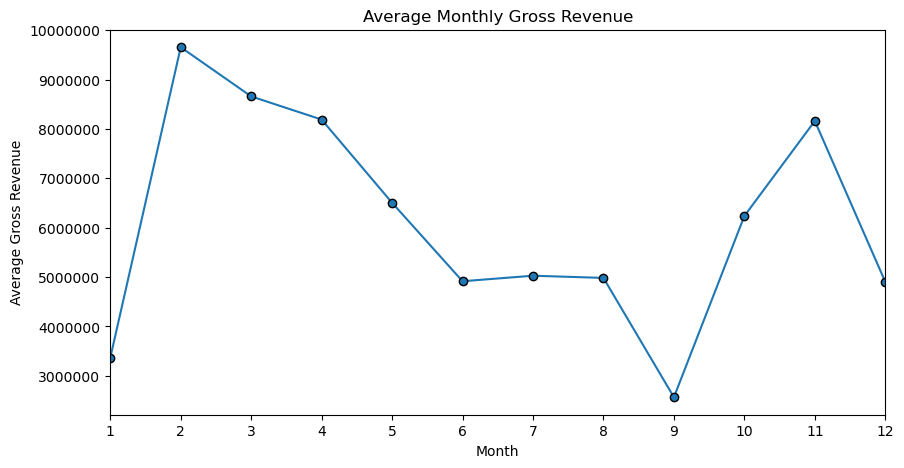

In [11]:
# Aggregating the revenues by month
df2 = df.groupby('Month')['Gross'].mean()

# Creating a line plot with dots (markers)
plt.figure(figsize=(10, 5))                                      # Setting the figure size
ax = df2.plot(kind='line', marker='o', markeredgecolor='black')  # Plotting the line graph with 'o' as marker for dots

# Disable scientific notation on the Y-axis
ax.ticklabel_format(style='plain', axis='y')   # Ensure normal numbers on the Y-axis

# Setting the x-axis to show each month as an integer (from 1 to 12)
ax.set_xticks(range(1, 13))                    # Set x-axis ticks from 1 to 12 for each month

# Set the x-axis limits to start at 1 and end at 12
ax.set_xlim(1, 12)                             # Ensuring the x-axis starts at 1 and finishes at 12

# Adding title and labels
ax.set_title("Average Monthly Gross Revenue")  # Setting the title of the plot
ax.set_ylabel("Average Gross Revenue")         # Setting the Y-axis label
ax.set_xlabel("Month")                         # Setting the X-axis label

# Display the plot
plt.show()

# Use of Data Analysis for Air Quality Management

To monitor the status of ambient air quality, The Central Pollution Control Board
(CPCB), India, operates a vast network of monitoring stations spread across the country.
Parameters regularly monitored include sulfur dioxide (SO2), oxides of nitrogen as
nitrogen dioxide (NO2), ozone, and fine particulate matter (PM2.5).c

#### Importing the data and examining the characteristics of the dataset

In [12]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/DataRepo2019/Data-files/master/NSIT%20Dwarka.csv"

# Reading the CSV file
aqdata = pd.read_csv(url)

# Display the first few rows of the DataFrame
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,NaN,22.70,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,NaN,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,NaN,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,NaN,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,NaN,37.17,7.34,11.06


In [13]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  2191 non-null   object 
 1   To Date    2191 non-null   object 
 2   PM2.5      1630 non-null   float64
 3   SO2        2108 non-null   float64
 4   Ozone      2086 non-null   float64
 5   NO2        2087 non-null   float64
dtypes: float64(4), object(2)
memory usage: 102.9+ KB


#### Data wrangling

In [14]:
aqdata['From Date'] = pd.to_datetime(aqdata['From Date'], format='%d-%m-%Y %H:%M')  # Convert 'From Date' to datetime
aqdata['To Date'] = pd.to_datetime(aqdata['To Date'], format='%d-%m-%Y %H:%M')      # Convert 'To Date' to datetime
aqdata['SO2'] = pd.to_numeric(aqdata['SO2'], errors='coerce')                       # Convert 'SO2' to numeric
aqdata['NO2'] = pd.to_numeric(aqdata['NO2'], errors='coerce')                       # Convert 'NO2' to numeric
aqdata['Ozone'] = pd.to_numeric(aqdata['Ozone'], errors='coerce')                   # Convert 'Ozone' to numeric
aqdata['PM2.5'] = pd.to_numeric(aqdata['PM2.5'], errors='coerce')                   # Convert 'PM2.5' to numeric

aqdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   float64       
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 102.9 KB


In [15]:
# Show NA's for each column
aqdata.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [16]:
# Replace 'None' string with NaN
aqdata = aqdata.replace({'None': np.nan})

# Drop rows where 'From Date' is NaN
aqdata = aqdata.dropna(subset=['From Date'])

# Extract the year from the 'From Date' column and convert it to integer
aqdata['Year'] = pd.DatetimeIndex(aqdata['From Date']).year.astype(int)

# Display the first few rows of the DataFrame
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2,Year
0,2014-01-01,2014-01-02,NaN,22.70,8.63,5.59,2014
1,2014-01-02,2014-01-03,NaN,8.72,8.43,3.68,2014
2,2014-01-03,2014-01-04,NaN,13.83,9.77,3.83,2014
3,2014-01-04,2014-01-05,NaN,27.64,6.83,9.64,2014
4,2014-01-05,2014-01-06,NaN,37.17,7.34,11.06,2014


In [17]:
# Show NA's for each column
aqdata.isna().sum()

From Date      0
To Date        0
PM2.5        561
SO2           83
Ozone        105
NO2          104
Year           0
dtype: int64

In [18]:
# Extracting the data for each year
aq2014 = aqdata[aqdata['Year'] == 2014]  # Extracting the data for the year 2014
aq2015 = aqdata[aqdata['Year'] == 2015]  # Extracting the data for the year 2015
aq2016 = aqdata[aqdata['Year'] == 2016]  # Extracting the data for the year 2016
aq2017 = aqdata[aqdata['Year'] == 2017]  # Extracting the data for the year 2017
aq2018 = aqdata[aqdata['Year'] == 2018]  # Extracting the data for the year 2018
aq2019 = aqdata[aqdata['Year'] == 2019]  # Extracting the data for the year 2019

# Show the top 5 rows
aq2019.head()  

,From Date,To Date,PM2.5,SO2,Ozone,NO2,Year
1826,2019-01-01,2019-01-02,231.39,30.67,15.40,28.05,2019
1827,2019-01-02,2019-01-03,252.35,36.08,24.96,34.26,2019
1828,2019-01-03,2019-01-04,348.53,34.19,11.88,24.73,2019
1829,2019-01-04,2019-01-05,231.49,17.53,7.87,24.17,2019
1830,2019-01-05,2019-01-06,254.39,27.66,23.85,36.03,2019


In [19]:
# Dropping the null values for the four years chosen for analysis
aq2016 = aq2016.dropna() 
aq2017 = aq2017.dropna() 
aq2018 = aq2018.dropna() 
aq2019 = aq2019.dropna() 

# Show NA's for each column in 2019
aq2019.isna().sum()

From Date    0
To Date      0
PM2.5        0
SO2          0
Ozone        0
NO2          0
Year         0
dtype: int64

#### Data visualization

#### 1. Plotting the yearly averages of the pollutant:

Based on monitored 24-hourly average ambient air concentrations of PM2.5, SO2,
NO2, and ozone (O3), yearly averages are plotted to identify parameters for which the
prescribed national ambient air quality standards for annual average are exceeded.

In [20]:
# Yearly averages for SO2 in each year
s16avg = round(aq2016['SO2'].mean(), 2)    # SO2 average for 2016
s17avg = round(aq2017['SO2'].mean(), 2)    # SO2 average for 2017
s18avg = round(aq2018['SO2'].mean(), 2)    # SO2 average for 2018
s19avg = round(aq2019['SO2'].mean(), 2)    # SO2 average for 2019

# Yearly averages for PM2.5 in each year
p16avg = round(aq2016['PM2.5'].mean(), 2)  # PM2.5 average for 2016
p17avg = round(aq2017['PM2.5'].mean(), 2)  # PM2.5 average for 2017
p18avg = round(aq2018['PM2.5'].mean(), 2)  # PM2.5 average for 2018
p19avg = round(aq2019['PM2.5'].mean(), 2)  # PM2.5 average for 2019

# Yearly averages for NO2 in each year
n16avg = round(aq2016['NO2'].mean(), 2)    # NO2 average for 2016
n17avg = round(aq2017['NO2'].mean(), 2)    # NO2 average for 2017
n18avg = round(aq2018['NO2'].mean(), 2)    # NO2 average for 2018
n19avg = round(aq2019['NO2'].mean(), 2)    # NO2 average for 2019

In [21]:
#Creating data frames with yearly averages for each pollutant
dfs=pd.DataFrame({'Yearly average':[s16avg,s17avg,s18avg,s19avg]},index=['2016','2017','2018','2019']) #dfs is for SO2
dfp=pd.DataFrame({'Yearly average':[p16avg,p17avg,p18avg,p19avg]},index=['2016','2017','2018','2019']) #dfp is for PM2.5
dfn=pd.DataFrame({'Yearly average':[n16avg,n17avg,n18avg,n19avg]},index=['2016','2017','2018','2019']) #dfn is for NO2

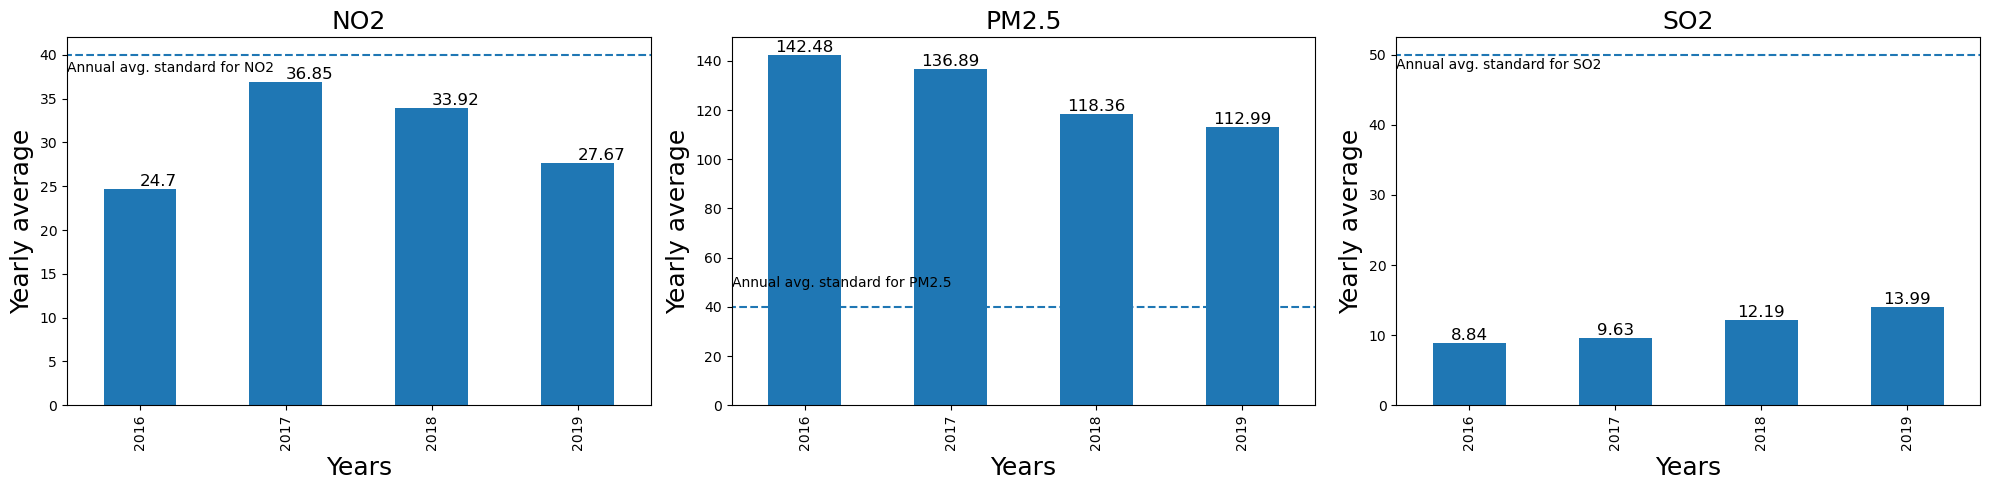

In [22]:
# Creating a figure with 3 subplots - 1 for each pollutant
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))                         # Create a figure with 3 subplots side by side

# Creating a DataFrame plot for the yearly averages for NO2
dfn.plot(kind='bar', ax=ax1)                                                       # Plotting NO2 data on the first subplot

# Setting the title for the first axes object (NO2)
ax1.set_title("NO2", fontsize=18)                                                  # Setting the title for the NO2 plot

# Setting the X-axis label for the NO2 graph
ax1.set_xlabel("Years", fontsize=18)                                               # Label for X-axis (Years) in the NO2 plot
ax1.legend().set_visible(False)                                                    # Hiding the legend

# Setting the Y-axis label for the NO2 graph
ax1.set_ylabel("Yearly average", fontsize=18)                                      # Label for Y-axis in the NO2 plot

# Creating a dashed line to indicate the annual standard for NO2
ax1.hlines(40, -.9, 15, linestyles="dashed")                                       # Dashed line for NO2 standard at 40

# Labelling the dashed line for NO2 standard
ax1.annotate('Annual avg. standard for NO2', (-0.5, 38))                           # Label for the dashed line

# Labelling the bars in the NO2 graph
for p in ax1.patches:  # Loop through all the bars in the plot
    ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),  # Add text at the top of each bar
                 color="black", ha="left", va='bottom', fontsize=12)               # Align text and set its properties

# Plotting the yearly averages for PM2.5 similarly
dfp.plot(kind='bar', ax=ax2)                                                       # Plotting PM2.5 data on the second subplot
ax2.set_title("PM2.5", fontsize=18)                                                # Setting the title for the PM2.5 plot
ax2.hlines(40, -.9, 15, linestyles="dashed")                                       # Dashed line for PM2.5 standard at 40
ax2.annotate('Annual avg. standard for PM2.5', (-0.5, 48))                         # Label for the dashed line
ax2.legend().set_visible(False)                                                    # Hiding the legend for PM2.5 plot
ax2.set_xlabel("Years", fontsize=18)                                               # Adding X-axis label for PM2.5
ax2.set_ylabel("Yearly average", fontsize=18)                                      # Adding Y-axis label for PM2.5
for p in ax2.patches:                                                              # Loop through all the bars in the PM2.5 plot
    ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),  # Add text at the top of each bar
                 color="black", ha="center", va='bottom', fontsize=12)             # Align text and set its properties

# Plotting the yearly averages for SO2 similarly
dfs.plot(kind='bar', ax=ax3)                                                       # Plotting SO2 data on the third subplot
ax3.hlines(50, -.9, 15, linestyles="dashed")                                       # Dashed line for SO2 standard at 50
ax3.annotate('Annual avg. standard for SO2', (-0.5, 48))                           # Label for the dashed line
ax3.set_title("SO2", fontsize=18)                                                  # Setting the title for the SO2 plot
ax3.legend().set_visible(False)                                                    # Hiding the legend for SO2 plot
ax3.set_xlabel("Years", fontsize=18)                                               # Adding X-axis label for SO2
ax3.set_ylabel("Yearly average", fontsize=18)                                      # Adding Y-axis label for SO2
for p in ax3.patches:                                                              # Loop through all the bars in the SO2 plot
    ax3.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),  # Add text at the top of each bar
                 color="black", ha="center", va='bottom', fontsize=12)             # Align text and set its properties

# Display the plot
plt.tight_layout()
plt.show()

##### 2. Plotting the number of days in each year where 24-hourly standards are exceeded for PM2.5 and NO2

In [23]:
# Creating intervals for 2016 with the number of days with PM2.5 concentration falling in that interval
a2 = aq2016[(aq2016['PM2.5'] <= 60)]['PM2.5'].count()                              # Count days in 2016 where PM2.5 <= 60
b2 = aq2016[((aq2016['PM2.5'] > 60) & (aq2016['PM2.5'] <= 120))]['PM2.5'].count()  # Count days in 2016 where PM2.5 is between 61 and 120
c2 = aq2016[((aq2016['PM2.5'] > 120) & (aq2016['PM2.5'] <= 180))]['PM2.5'].count() # Count days in 2016 where PM2.5 is between 121 and 180
d2 = aq2016[(aq2016['PM2.5'] > 180)]['PM2.5'].count()                              # Count days in 2016 where PM2.5 > 180

# Creating a DataFrame for 2016 with the intervals and corresponding number of days
dfpb2016 = pd.DataFrame({'year': '2016',                                # Year 2016
                         'pm levels': ['<60',                           # PM2.5 level interval 1: less than 60
                                       'between 61 and 120',            # PM2.5 level interval 2: between 61 and 120
                                       'between 121 and 180',           # PM2.5 level interval 3: between 121 and 180
                                       'greater than 180'],             # PM2.5 level interval 4: greater than 180
                         'number of critical days': [a2, b2, c2, d2]})  # Number of critical days for each interval in 2016

# Creating intervals for 2017 with the number of days with PM2.5 concentration falling in each interval
a3 = aq2017[(aq2017['PM2.5'] <= 60)]['PM2.5'].count()                               # Count days in 2017 where PM2.5 <= 60
b3 = aq2017[((aq2017['PM2.5'] > 60) & (aq2017['PM2.5'] <= 120))]['PM2.5'].count()   # Count days in 2017 where PM2.5 is between 61 and 120
c3 = aq2017[((aq2017['PM2.5'] > 120) & (aq2017['PM2.5'] <= 180))]['PM2.5'].count()  # Count days in 2017 where PM2.5 is between 121 and 180
d3 = aq2017[(aq2017['PM2.5'] > 180)]['PM2.5'].count()                               # Count days in 2017 where PM2.5 > 180

# Creating a DataFrame for 2017 with the intervals and corresponding number of days
dfpb2017 = pd.DataFrame({'year': '2017',                                # Year 2017
                         'pm levels': ['<60',                           # PM2.5 level interval 1: less than 60
                                       'between 61 and 120',            # PM2.5 level interval 2: between 61 and 120
                                       'between 121 and 180',           # PM2.5 level interval 3: between 121 and 180
                                       'greater than 180'],             # PM2.5 level interval 4: greater than 180
                         'number of critical days': [a3, b3, c3, d3]})  # Number of critical days for each interval in 2017

# Creating intervals for 2018 with the number of days with PM2.5 concentration falling in each interval
a4 = aq2018[(aq2018['PM2.5'] <= 60)]['PM2.5'].count()                               # Count days in 2018 where PM2.5 <= 60
b4 = aq2018[((aq2018['PM2.5'] > 60) & (aq2018['PM2.5'] <= 120))]['PM2.5'].count()   # Count days in 2018 where PM2.5 is between 61 and 120
c4 = aq2018[((aq2018['PM2.5'] > 120) & (aq2018['PM2.5'] <= 180))]['PM2.5'].count()  # Count days in 2018 where PM2.5 is between 121 and 180
d4 = aq2018[(aq2018['PM2.5'] > 180)]['PM2.5'].count()                               # Count days in 2018 where PM2.5 > 180

# Creating a DataFrame for 2018 with the intervals and corresponding number of days
dfpb2018 = pd.DataFrame({'year': '2018',                                # Year 2018
                         'pm levels': ['<60',                           # PM2.5 level interval 1: less than 60
                                       'between 61 and 120',            # PM2.5 level interval 2: between 61 and 120
                                       'between 121 and 180',           # PM2.5 level interval 3: between 121 and 180
                                       'greater than 180'],             # PM2.5 level interval 4: greater than 180
                         'number of critical days': [a4, b4, c4, d4]})  # Number of critical days for each interval in 2018

# Creating intervals for 2019 with the number of days with PM2.5 concentration falling in each interval
a5 = aq2019[(aq2019['PM2.5'] <= 60)]['PM2.5'].count()                               # Count days in 2019 where PM2.5 <= 60
b5 = aq2019[((aq2019['PM2.5'] > 60) & (aq2019['PM2.5'] <= 120))]['PM2.5'].count()   # Count days in 2019 where PM2.5 is between 61 and 120
c5 = aq2019[((aq2019['PM2.5'] > 120) & (aq2019['PM2.5'] <= 180))]['PM2.5'].count()  # Count days in 2019 where PM2.5 is between 121 and 180
d5 = aq2019[(aq2019['PM2.5'] > 180)]['PM2.5'].count()                               # Count days in 2019 where PM2.5 > 180

# Creating a DataFrame for 2019 with the intervals and corresponding number of days
dfpb2019 = pd.DataFrame({'year': '2019',                                # Year 2019
                         'pm levels': ['<60',                           # PM2.5 level interval 1: less than 60
                                       'between 61 and 120',            # PM2.5 level interval 2: between 61 and 120
                                       'between 121 and 180',           # PM2.5 level interval 3: between 121 and 180
                                       'greater than 180'],             # PM2.5 level interval 4: greater than 180
                         'number of critical days': [a5, b5, c5, d5]})  # Number of critical days for each interval in 2019

# Displaying the DataFrame for 2019
dfpb2019.head()                                                         # Display the first few rows of the DataFrame for 2019

,year,pm levels,number of critical days
0,2019,<60,81
1,2019,between 61 and 120,158
2,2019,between 121 and 180,69
3,2019,greater than 180,54


In [24]:
dfpivot2019 = dfpb2019.pivot(index='year', columns='pm levels', values='number of critical days')  # Pivoting 2019 data
dfpivot2018 = dfpb2018.pivot(index='year', columns='pm levels', values='number of critical days')  # Pivoting 2018 data
dfpivot2017 = dfpb2017.pivot(index='year', columns='pm levels', values='number of critical days')  # Pivoting 2017 data
dfpivot2016 = dfpb2016.pivot(index='year', columns='pm levels', values='number of critical days')  # Pivoting 2016 data

dfpivot2019.head()  # Display the pivoted DataFrame for 2019

pm levels,<60,between 121 and 180,between 61 and 120,greater than 180
year,,,,
2019,81,69,158,54


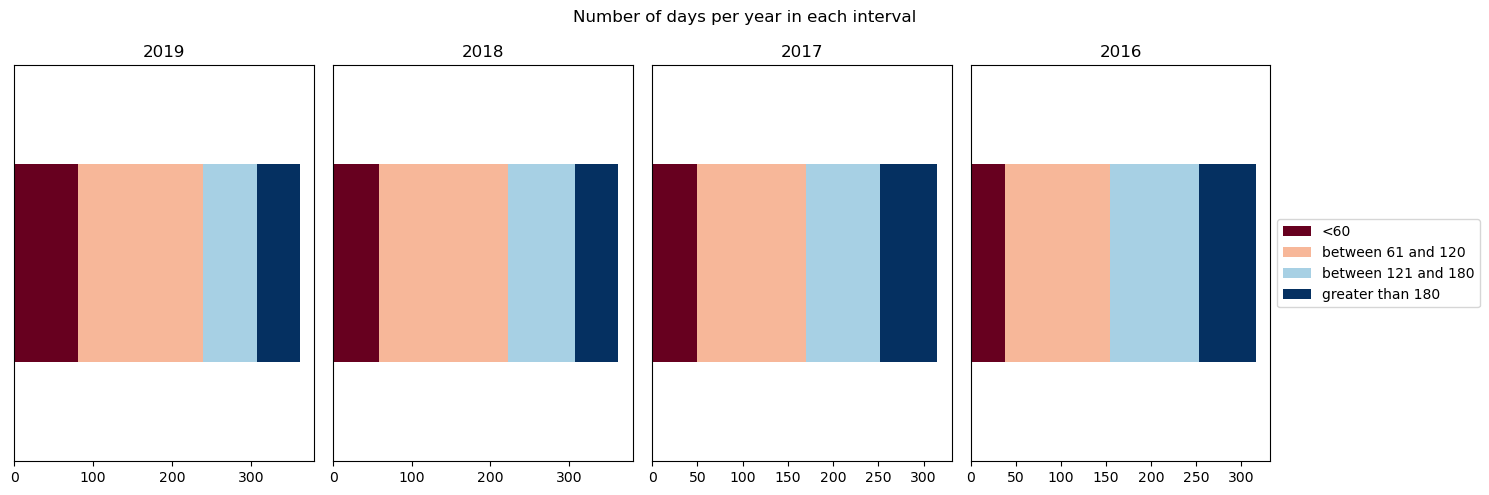

In [25]:
# Creating a figure with 4 sub-plots, one for each year from 2016-19
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)            # Create a figure with 4 subplots side by side
fig.suptitle("Number of days per year in each interval")  # Setting the main title for the figure

# Updated cmap retrieval to avoid deprecation warning
cmp = plt.colormaps.get_cmap('RdBu')                      # Use the updated way to get the colormap

# Plotting stacked horizontal bar charts for each year to represent intervals of PM2.5 levels
dfpivot2019.loc[:, ['<60', 'between 61 and 120', 'between 121 and 180', 'greater than 180']].plot.barh(stacked=True, 
                                                                                                       cmap=cmp, 
                                                                                                       figsize=(15, 5), 
                                                                                                       ax=ax1)   
dfpivot2018.loc[:, ['<60', 'between 61 and 120', 'between 121 and 180', 'greater than 180']].plot.barh(stacked=True, 
                                                                                                       cmap=cmp, 
                                                                                                       figsize=(15, 5), 
                                                                                                       ax=ax2)
dfpivot2017.loc[:, ['<60', 'between 61 and 120', 'between 121 and 180', 'greater than 180']].plot.barh(stacked=True, 
                                                                                                       cmap=cmp, 
                                                                                                       figsize=(15, 5), 
                                                                                                       ax=ax3)
dfpivot2016.loc[:, ['<60', 'between 61 and 120', 'between 121 and 180', 'greater than 180']].plot.barh(stacked=True, 
                                                                                                       cmap=cmp, 
                                                                                                       figsize=(15, 5), 
                                                                                                       ax=ax4)
# Setting the properties - legend, y-axis, and title
ax1.legend().set_visible(False)     # Hiding the legend for the first subplot
ax2.legend().set_visible(False)     # Hiding the legend for the second subplot
ax3.legend().set_visible(False)     # Hiding the legend for the third subplot
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Showing the legend outside the fourth subplot

# Hiding the y-axis labels for all subplots
ax1.get_yaxis().set_visible(False)  # Hiding y-axis for the first subplot
ax2.get_yaxis().set_visible(False)  # Hiding y-axis for the second subplot
ax3.get_yaxis().set_visible(False)  # Hiding y-axis for the third subplot
ax4.get_yaxis().set_visible(False)  # Hiding y-axis for the fourth subplot

# Setting titles for each year
ax1.set_title('2019')  # Title for the first subplot
ax2.set_title('2018')  # Title for the second subplot
ax3.set_title('2017')  # Title for the third subplot
ax4.set_title('2016')  # Title for the fourth subplot

# Display the plot
plt.tight_layout()     # Adjust layout to prevent overlap
plt.show()

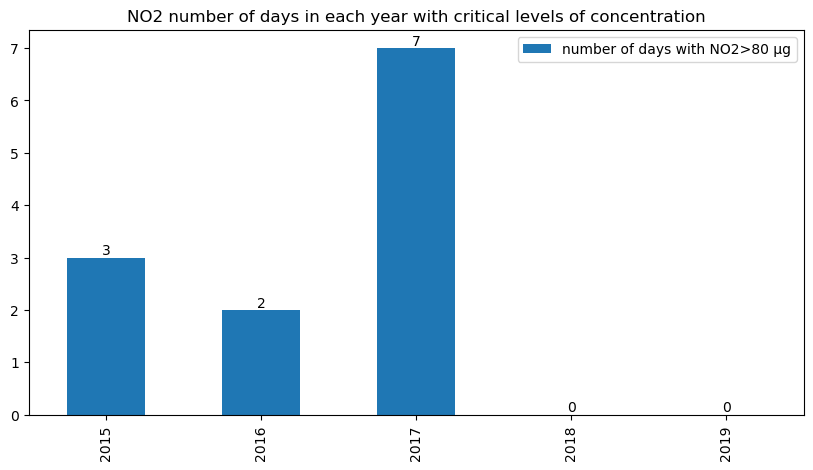

In [26]:
a = aq2015[(aq2015['NO2'] >= 80)]['NO2'].count()  # Count days in 2015 with NO2 >= 80
b = aq2016[(aq2016['NO2'] >= 80)]['NO2'].count()  # Count days in 2016 with NO2 >= 80
c = aq2017[(aq2017['NO2'] >= 80)]['NO2'].count()  # Count days in 2017 with NO2 >= 80
d = aq2018[(aq2018['NO2'] >= 80)]['NO2'].count()  # Count days in 2018 with NO2 >= 80
e = aq2019[(aq2019['NO2'] >= 80)]['NO2'].count()  # Count days in 2019 with NO2 >= 80

# Creating a DataFrame to store the number of critical days for NO2 concentration by year
dfno = pd.DataFrame({'years': ['2015', '2016', '2017', '2018', '2019'],  # List of years
                     'number of days with NO2>80 μg': [a, b, c, d, e]})  # Number of critical NO2 days per year

# Plotting the data as a bar chart
ax = dfno.plot(kind='bar', figsize=(10, 5))  # Create a bar plot for the number of critical NO2 days

# Setting custom labels for the x-axis
ax.set_xticklabels(['2015', '2016', '2017', '2018', '2019'])  # Set x-axis labels as years

# Setting the title for the plot
ax.set_title("NO2 number of days in each year with critical levels of concentration")  # Add a plot title

# Adding labels to each bar in the chart
for p in ax.patches:                             # Loop through each bar (patch) in the plot
    ax.annotate(p.get_height(),                  # Label the height (value) of each bar
                (p.get_x() + p.get_width() / 2,  # Position the label in the center of the bar
                 p.get_height()),                # Position the label at the top of the bar
                ha='center', va='bottom')        # Center the label horizontally and align it at the bottom

##### Identifying the months where PM2.5 daily values exceed critical levels on the majority of the days

In [27]:
#Creating a dataframe for 2016 with the number of days in each month where the PM2.5 concentration is >180
aq2016['Month'] = pd.DatetimeIndex(aq2016['From Date']).month     # Extract month from 'From Date' for 2016
aq2016['condition'] = (aq2016['PM2.5']>=180 )                     # Set 'condition' to True if PM2.5 >= 180 in 2016
aq2016['condition'] = aq2016['condition'].replace({False:np.nan}) # Replace False with NaN in the 'condition' column
selection1 = aq2016.groupby('Month')['condition'].count()         # Count critical days in each month for 2016

#Repeating the above process for 2017, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2017['Month'] = pd.DatetimeIndex(aq2017['From Date']).month     # Extract month from 'From Date' for 2017
aq2017['condition'] = (aq2017['PM2.5']>=180 )                     # Set 'condition' to True if PM2.5 >= 180 in 2017
aq2017['condition'] = aq2017['condition'].replace({False:np.nan}) # Replace False with NaN in the 'condition' column
selection2 = aq2017.groupby('Month')['condition'].count()         # Count critical days in each month for 2017

#Repeating the above process for 2018, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2018['Month'] = pd.DatetimeIndex(aq2018['From Date']).month     # Extract month from 'From Date' for 2018
aq2018['condition'] = (aq2018['PM2.5']>=180 )                     # Set 'condition' to True if PM2.5 >= 180 in 2018
aq2018['condition'] = aq2018['condition'].replace({False:np.nan}) # Replace False with NaN in the 'condition' column
selection3 = aq2018.groupby('Month')['condition'].count()         # Count critical days in each month for 2018

#Repeating the above process for 2019, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2019['Month'] = pd.DatetimeIndex(aq2019['From Date']).month     # Extract month from 'From Date' for 2019
aq2019['condition'] = (aq2019['PM2.5']>=180 )                     # Set 'condition' to True if PM2.5 >= 180 in 2019
aq2019['condition'] = aq2019['condition'].replace({False:np.nan}) # Replace False with NaN in the 'condition' column
selection4 = aq2019.groupby('Month')['condition'].count()         # Count critical days in each month for 2019

In [28]:
# selectionc data frame is a consolidated dataframe showing month-wise critical values of PM2.5 for every year
selectionc=pd.concat([selection1,selection1,selection3,selection4],axis=1)

# renaming the columns
selectionc.columns=['2016','2017','2018','2019']
selectionc

,2016,2017,2018,2019
Month,,,,
1,20,20,23,14
2,3,3,5,3
3,1,1,0,0
4,3,3,0,1
5,3,3,0,2
6,7,7,4,1
7,2,2,0,0
8,0,0,0,0
9,2,2,0,0


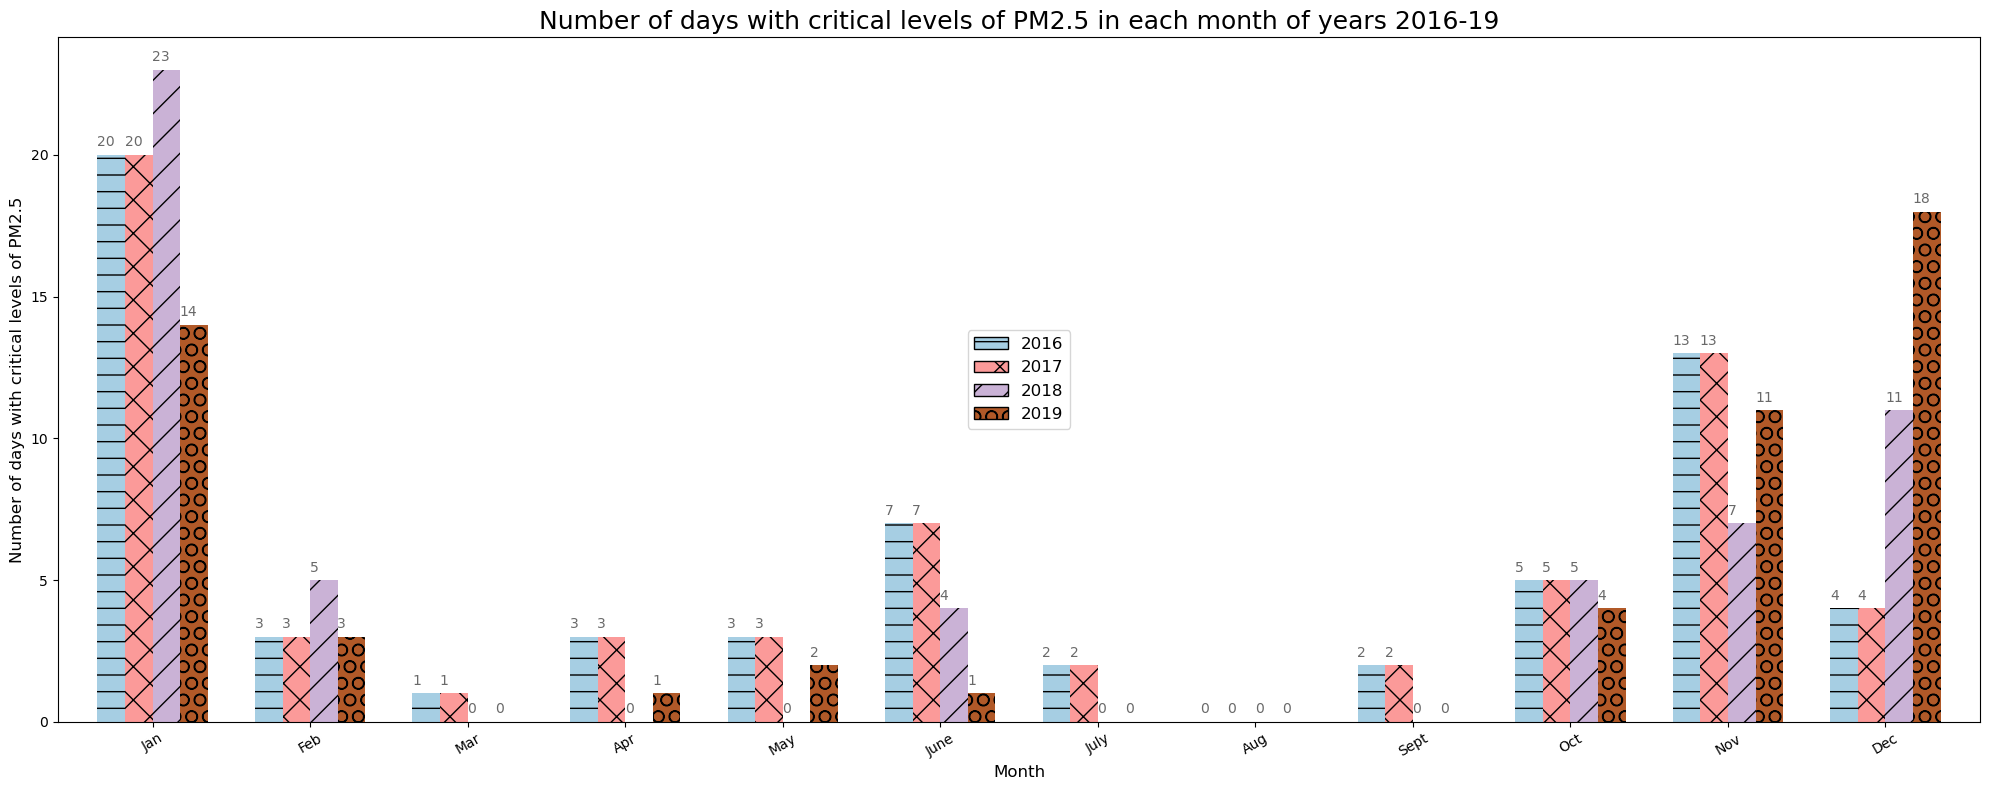

In [29]:
import matplotlib.patches as mpatches    # Import to create proxy patches for the legend

# Creating a bar chart representing the number of days with critical levels of PM2.5 (>180) concentrations
fig, ax = plt.subplots(figsize=(20, 8))                                                # Increase figure size
ax = selectionc.plot(kind='bar', width=0.7, align='center', colormap='Paired', ax=ax)  # Bar chart for critical PM2.5 days

bars = ax.patches                # Get the bars (patches) in the plot

# Creating patterns to represent each year
patterns = ('-', 'x', '/', 'O')  # Define hatch patterns for the bars

# Colors from the colormap
colors = plt.cm.Paired(np.linspace(0, 1, len(patterns)))  # Get the colors from the colormap

# Creating proxy artists for the legend to handle both hatch patterns and colors properly
handles = [mpatches.Patch(facecolor=colors[i], edgecolor='black', hatch=patterns[i]) for i in range(len(patterns))]  # Create proxy patches

# Setting the legend with the proxy artists and year labels, placing it in the center of the plot
ax.legend(handles, ['2016', '2017', '2018', '2019'], loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=12)           # Legend centered

# Creating a pattern for each bar
hatches = [p for p in patterns for i in range(len(selectionc))]  # Repeat each pattern for all bars

# Setting a pattern for each bar
for bar, hatch in zip(bars, hatches):  # Loop through each bar and assign a pattern
    bar.set_hatch(hatch)               # Apply hatch pattern to the bar

# Labelling the months on the X-axis and the axis labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=30)  # Set month labels
ax.set_xlabel('Month', fontsize=12)                                         # Set X-axis label
ax.set_ylabel('Number of days with critical levels of PM2.5', fontsize=12)  # Set Y-axis label

# Labelling the bars with the corresponding values
for i in ax.patches:                   # Loop through all the bars in the plot
    ax.text(i.get_x() - .003,          # Position the label slightly left of the bar
            i.get_height() + .3,       # Position the label just above the bar
            round(i.get_height(), 2),  # Round the height value for display
            fontsize=10,               # Set font size for the label
            color='dimgrey')           # Set color for the label text

# Setting the title for the plot
ax.set_title("Number of days with critical levels of PM2.5 in each month of years 2016-19", fontsize=18) 

# Showing the final plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plot

# Worldwide COVID-19 cases – an analysis

In [30]:
url = "https://raw.githubusercontent.com/DataRepo2019/Data-files/master/COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx"

df = pd.read_excel(url)  # Use read_excel to load the Excel file

df.head()  # Display the first few rows of the DataFrame

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [32]:
df.describe()

,dateRep,day,month,year,cases,deaths,popData2019
count,26562,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,2020-04-21 03:27:51.109103360,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
min,2019-12-31 00:00:00,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,2020-03-25 00:00:00,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,2020-04-27 00:00:00,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,2020-05-29 00:00:00,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,2020-06-29 00:00:00,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09
std,NaN,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08


#### Data wrangling

In [33]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


In [34]:
#changing the column names
df.columns=['date','day','month','year','cases','deaths','country','old_country_code','country_code','population','continent']

df.head()

,date,day,month,year,cases,deaths,country,old_country_code,country_code,population,continent
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


In [35]:
df.drop(['old_country_code'], axis=1, inplace=True)  # Drop the 'old_country_code' column from the DataFrame

df1 = df[df.month != 12].copy()  # Ensure df1 is a copy, not a view, to avoid the warning

df1.isna().sum().sum() / len(df1) # Calculate the proportion of missing values in 'df1' by dividing total NaNs by the total rows

0.0047556142668428005

In [36]:
# Creating a copy of the DataFrame excluding rows where the month is December
df1 = df[df.month != 12].copy()  # Ensure df1 is a copy, not a view, to avoid the warning

# Dropping rows with NaN values
df1.dropna(inplace=True)         # Drop rows with missing values in df1

# Aggregating the data by country name, summing the 'cases' and 'deaths' columns
df_by_country = df1.groupby('country')[['cases', 'deaths']].sum()

df_by_country  # Display the aggregated DataFrame

,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


In [37]:
#Adding a new column for the mortality rate which is the ratio of the number of deaths to cases
df_by_country['mortality_rate'] = df_by_country['deaths']/df_by_country['cases']

df_by_country

,cases,deaths,mortality_rate
country,,,
Afghanistan,30967,721,0.023283
Albania,2402,55,0.022898
Algeria,13273,897,0.067581
Andorra,855,52,0.060819
Angola,267,11,0.041199
...,...,...,...
Vietnam,355,0,0.000000
Western_Sahara,208,1,0.004808
Yemen,1118,302,0.270125


#### Visualizing the data

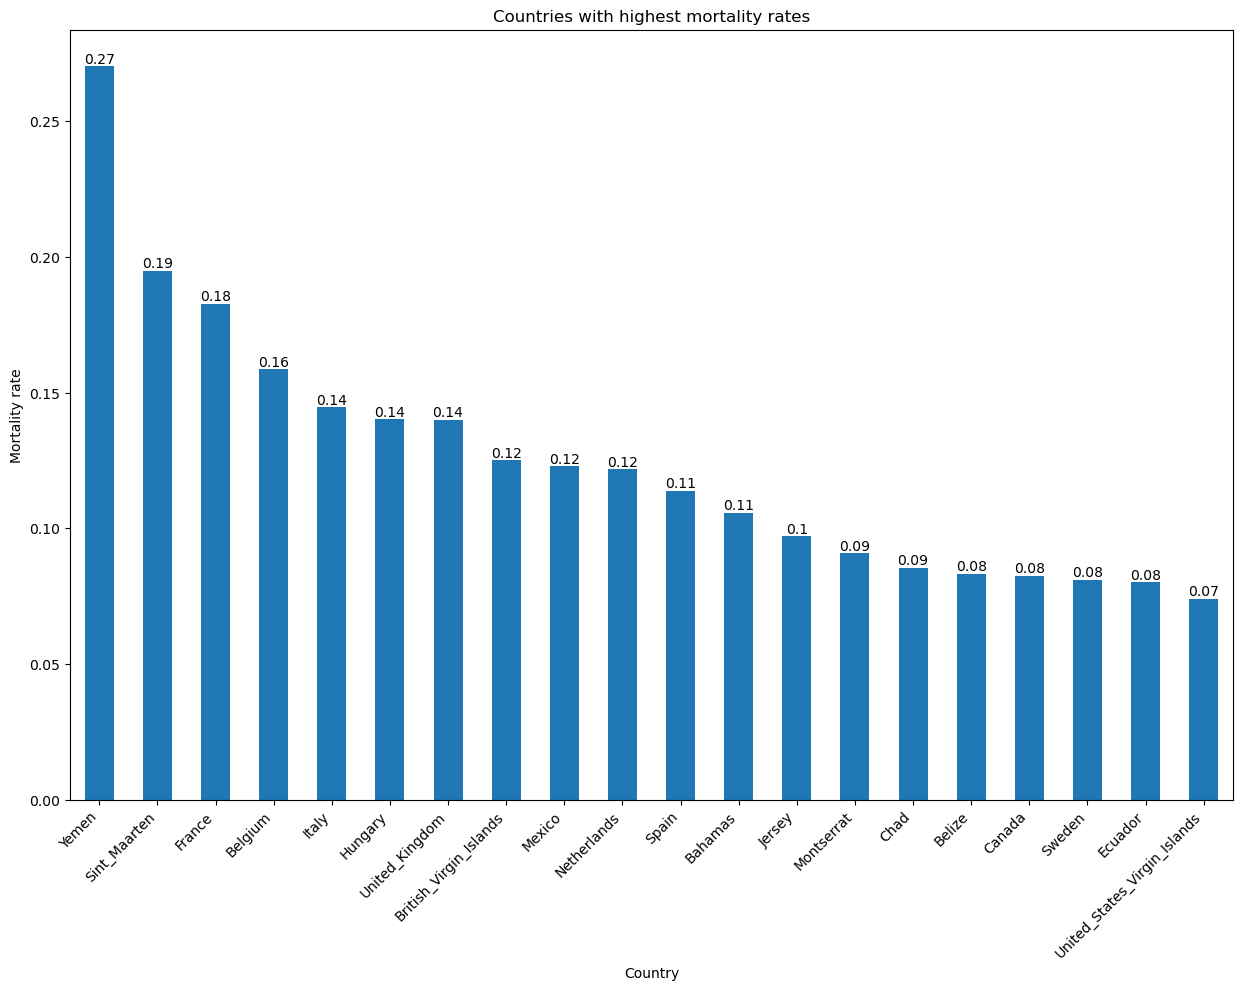

In [38]:
#Sorting the values for the mortality rate in the descending order

plt.figure(figsize=(15,10))                                                                  # Set the figure size to 15x10
ax = df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot(kind='bar')  # Plot the top 20 countries by mortality rate 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")                            # Rotate the x-axis labels by 45 degrees

for p in ax.patches:                                              # Loop through each bar in the chart
    ax.annotate(p.get_height().round(2),                          # Annotate each bar with its height 
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the annotation at the center-top of the bar
                ha='center', va='bottom')                         # Center the annotation horizontally 
    
ax.set_xlabel("Country")                                # Set the x-axis label to "Country"
ax.set_ylabel("Mortality rate")                         # Set the y-axis label to "Mortality rate"
ax.set_title("Countries with highest mortality rates"); # Set the title of the plot

In [39]:
# Check the mortality rate values for the lowest 20 countries
df_by_country['mortality_rate'].sort_values(ascending=True).head(20)

country
Dominica                             0.0
Bonaire, Saint Eustatius and Saba    0.0
Namibia                              0.0
New_Caledonia                        0.0
Grenada                              0.0
Cambodia                             0.0
Seychelles                           0.0
Greenland                            0.0
Gibraltar                            0.0
Saint_Vincent_and_the_Grenadines     0.0
Saint_Lucia                          0.0
Saint_Kitts_and_Nevis                0.0
French_Polynesia                     0.0
Fiji                                 0.0
Faroe_Islands                        0.0
Lesotho                              0.0
Falkland_Islands_(Malvinas)          0.0
Eritrea                              0.0
Holy_See                             0.0
Bhutan                               0.0
Name: mortality_rate, dtype: float64

##### Fraude???

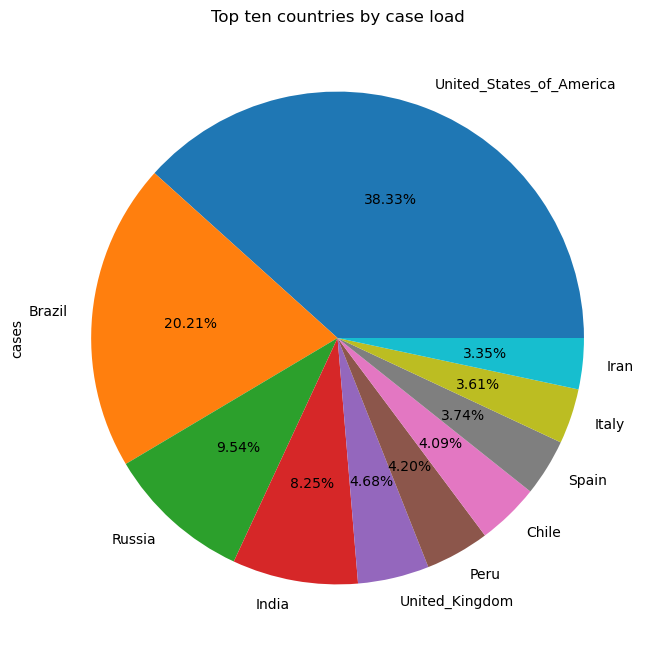

In [40]:
#Pie chart showing the countries with the highest number of COVID cases

df_cases = df_by_country['cases'].sort_values(ascending=False)  # Sort countries by the number of cases in descending order

ax = df_cases.head(10).plot(kind='pie',                         # Plot the top 10 countries by cases as a pie chart
                            autopct='%.2f%%',                   # Display percentage values on the pie chart with 2 decimal places
                            labels=df_cases.index,              # Set country names as the labels for each slice
                            figsize=(12,8))                     # Set the figure size to 12x8

ax.set_title("Top ten countries by case load");                 # Set the title for the pie chart

#### What did the two biggest cases have in common at the time of this event?

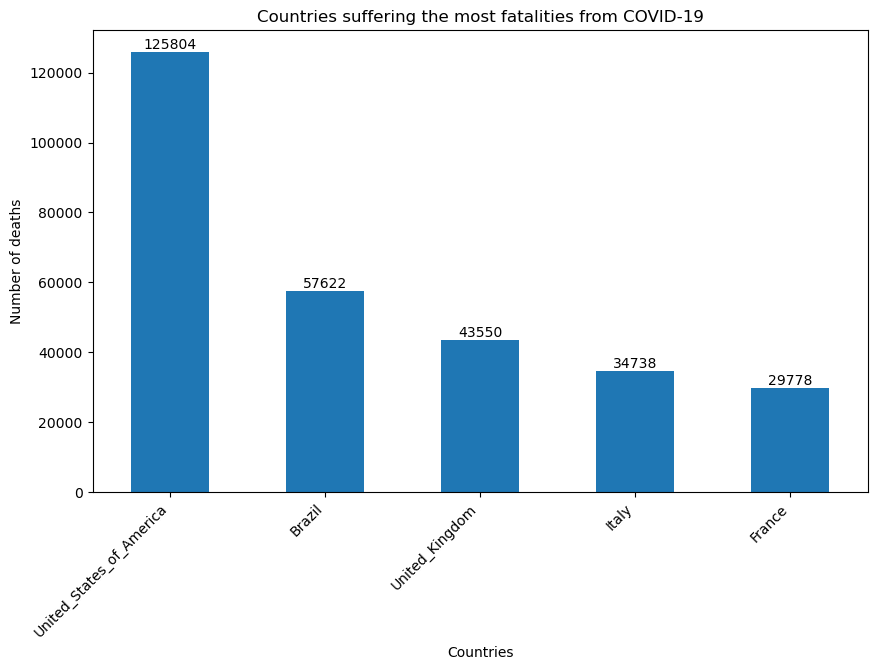

In [41]:
# Sorting the number of deaths in descending order and plotting the top 5 countries

plt.figure(figsize=(10,6))  # Set the figure size to 10x6
ax = df_by_country['deaths'].sort_values(ascending=False).head(5).plot(kind='bar')  # Plot a bar chart for the top 5 countries by deaths

# Setting the x-axis labels with a 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")   # Rotate x-axis labels by 45 degrees and align them to the right

# Annotating the bars with the death count
for p in ax.patches:  # Loop through each bar (patch) in the chart
    ax.annotate(p.get_height(),                                     # Display the height of each bar (death count)
                (p.get_x() + p.get_width() / 2, p.get_height()),    # Position the annotation at the center-top of the bar
                ha='center', va='bottom')                           # Center the annotation horizontally and place it just above the bar

# Adding labels and title
ax.set_title("Countries suffering the most fatalities from COVID-19")  # Set the title of the chart
ax.set_xlabel("Countries")          # Set the x-axis label to "Countries"
ax.set_ylabel("Number of deaths");  # Set the y-axis label to "Number of deaths"

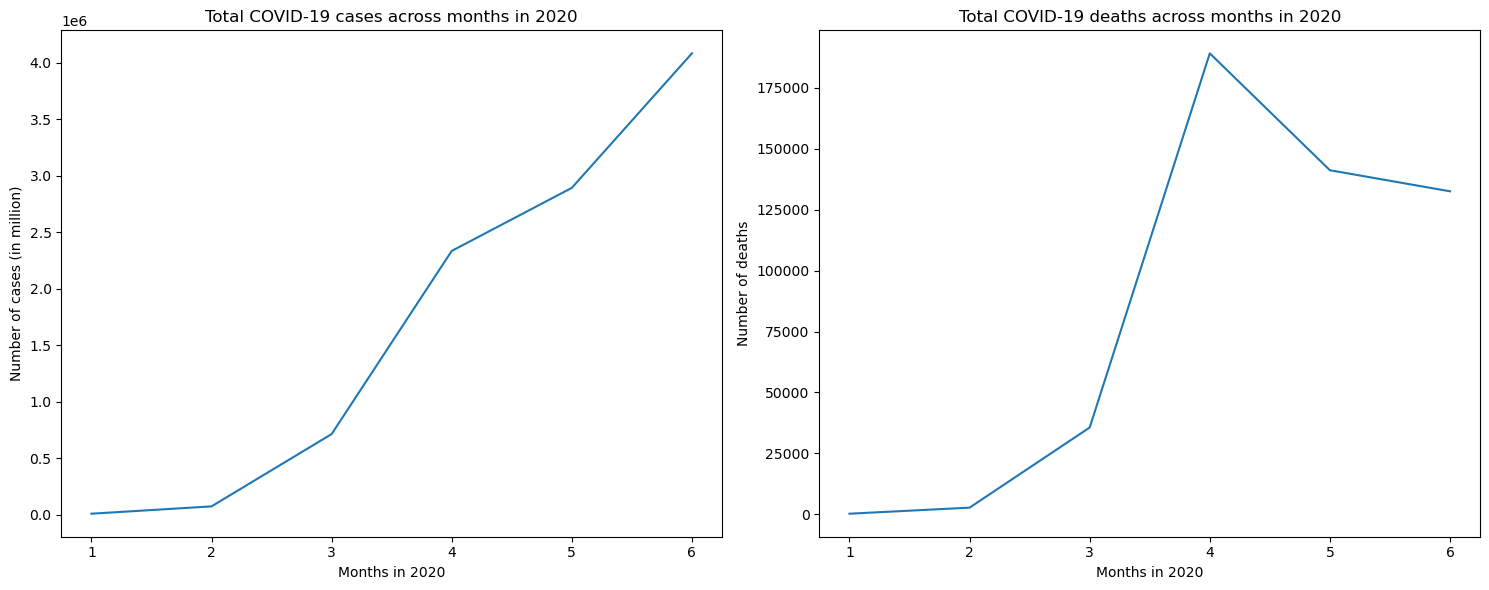

In [42]:
# Grouping the data by 'month' and summing the 'cases' and 'deaths' columns
df_by_month = df1.groupby('month')[['cases', 'deaths']].sum()  # Use a list of columns ['cases', 'deaths']

# Creating a figure with two subplots
fig = plt.figure(figsize=(15, 6))  # Set the figure size to 15x10

# Creating the first subplot for cases
ax1 = fig.add_subplot(1, 2, 1)  # Add a subplot for cases
df_by_month['cases'].plot(kind='line', ax=ax1)               # Plot the total cases across months
ax1.set_title("Total COVID-19 cases across months in 2020")  # Set the title for cases
ax1.set_xlabel("Months in 2020")                             # Set the x-axis label
ax1.set_ylabel("Number of cases (in million)")               # Set the y-axis label

# Creating the second subplot for deaths
ax2 = fig.add_subplot(1, 2, 2)                               # Add a subplot for deaths
df_by_month['deaths'].plot(kind='line', ax=ax2)              # Plot the total deaths across months
ax2.set_title("Total COVID-19 deaths across months in 2020") # Set the title for deaths
ax2.set_xlabel("Months in 2020")                             # Set the x-axis label
ax2.set_ylabel("Number of deaths")                           # Set the y-axis label

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display the plots

In [43]:
# Creating DataFrames for each country

# Monthwise aggregated data for Germany
df_germany = df1[df1.country == 'Germany']                                     # Filter data for Germany
df_germany_monthwise = df_germany.groupby('month')[['cases', 'deaths']].sum()  # Use a list for 'cases' and 'deaths'
df_germany_grouped = df_germany_monthwise.reset_index()                        # Reset the index for easier access

# Monthwise aggregated data for UK
df_uk = df1[df1.country == 'United_Kingdom']                         # Filter data for UK
df_uk_monthwise = df_uk.groupby('month')[['cases', 'deaths']].sum()  # Use a list for 'cases' and 'deaths'
df_uk_grouped = df_uk_monthwise.reset_index()                        # Reset the index for easier access

# Monthwise aggregated data for India
df_india = df1[df1.country == 'India']                                     # Filter data for India
df_india_monthwise = df_india.groupby('month')[['cases', 'deaths']].sum()  # Use a list for 'cases' and 'deaths'
df_india_grouped = df_india_monthwise.reset_index()                        # Reset the index for easier access

# Monthwise aggregated data for Italy
df_italy = df1[df1.country == 'Italy']                                     # Filter data for Italy
df_italy_monthwise = df_italy.groupby('month')[['cases', 'deaths']].sum()  # Use a list for 'cases' and 'deaths'
df_italy_grouped = df_italy_monthwise.reset_index()                        # Reset the index for easier access

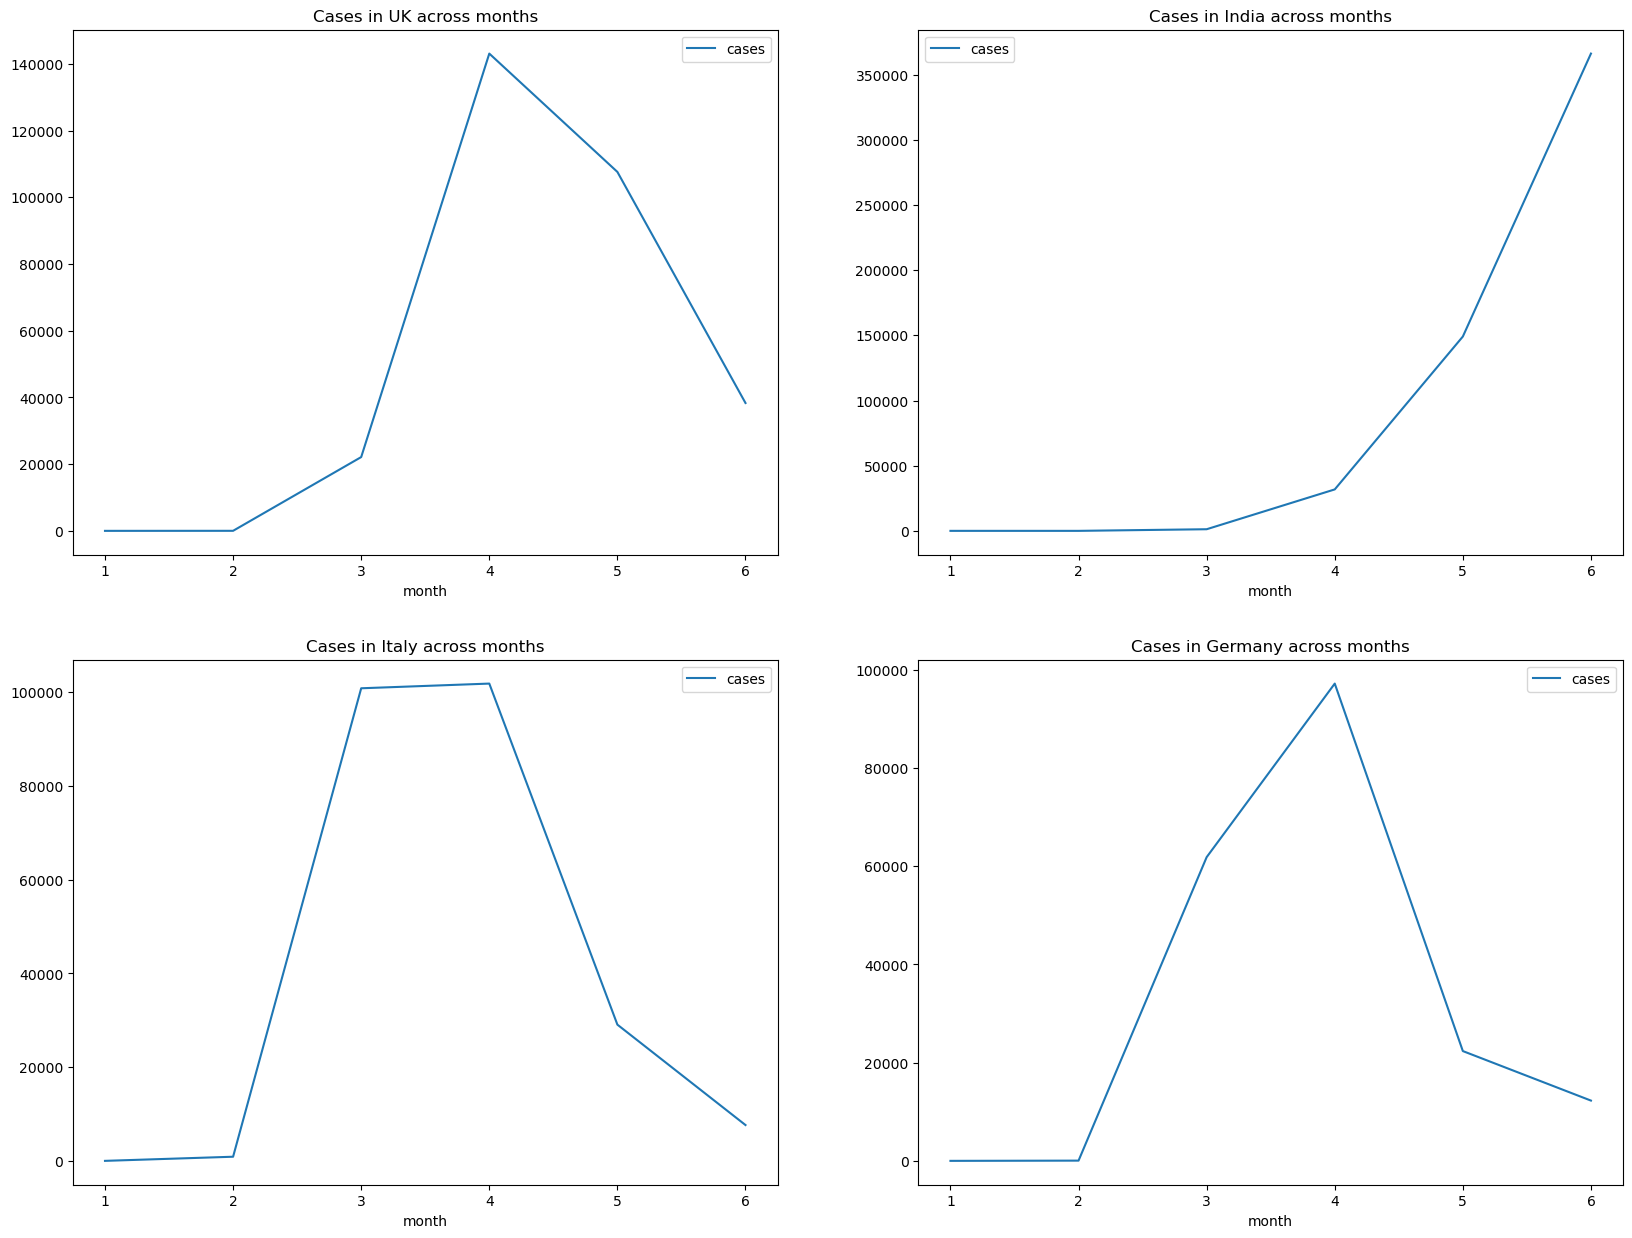

In [44]:
#Plotting the data for four countries (UK, India, Italy and Germany) where lockdowns were imposed
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1)
ax1.set_title("Cases in UK across months")
ax2=fig.add_subplot(2,2,2)
df_india_grouped.plot(kind='line',x='month',y='cases',ax=ax2)
ax2.set_title("Cases in India across months")
ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3)
ax3.set_title("Cases in Italy across months")
ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4)
ax4.set_title("Cases in Germany across months");